In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
Coffee = pd.read_csv('coffee.csv')
Coffee.columns

Index(['total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [3]:
X = Coffee[['aroma', 'body', 'species']]#'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'species']]
X_dummies = pd.get_dummies(X, drop_first=True)
y = Coffee['cupper_points']

X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=543)

In [4]:
DTR = DecisionTreeRegressor(max_depth=2)

DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'body <= 7.355\nsquared_error = 0.178\nsamples = 1004\nvalue = 7.497'),
 Text(0.25, 0.5, 'aroma <= 7.29\nsquared_error = 0.142\nsamples = 296\nvalue = 7.151'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.11\nsamples = 124\nvalue = 6.941'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.111\nsamples = 172\nvalue = 7.302'),
 Text(0.75, 0.5, 'aroma <= 7.78\nsquared_error = 0.122\nsamples = 708\nvalue = 7.642'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.092\nsamples = 505\nvalue = 7.544'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.115\nsamples = 203\nvalue = 7.884')]

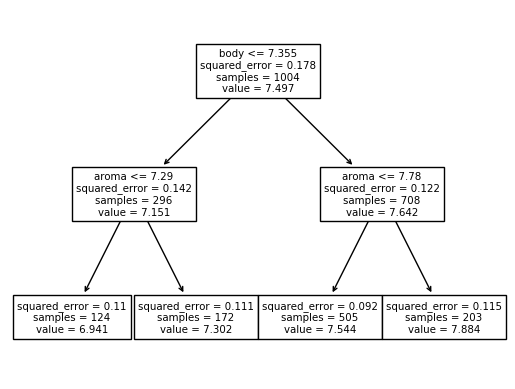

In [5]:
plot_tree(DTR, feature_names=X_train.columns)

In [6]:
# Prints the r-squared value for the training set.
DTR.score(X_train, y_train)

0.4275857555987084

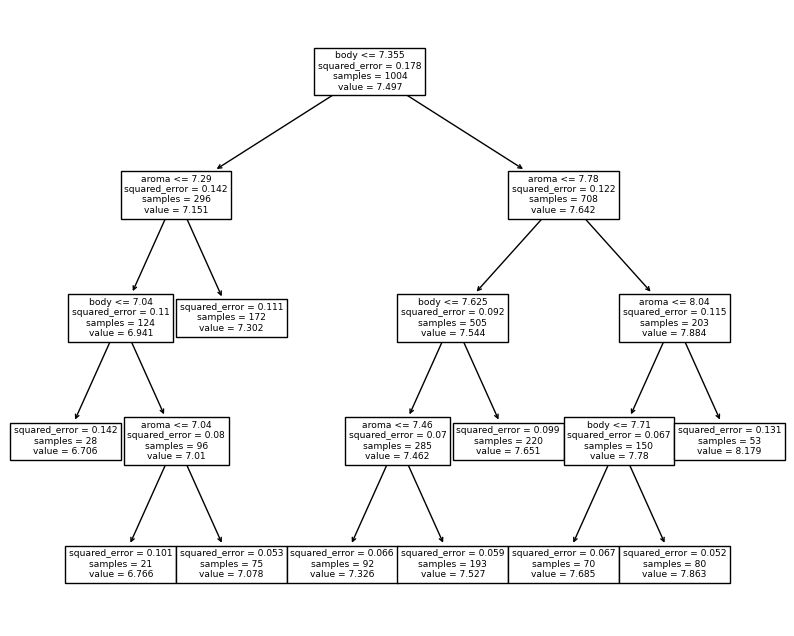

In [7]:
DTR = DecisionTreeRegressor(max_leaf_nodes=10, min_samples_leaf=20)
DTR.fit(X_train,y_train)
#Adjust plot size to make the tree more readable
plt.figure(figsize=(10, 8))
plot_tree(DTR, feature_names=X_train.columns)
plt.show() #Suppresses the text output

In [8]:
# Adjust ccp_alpha to improve how well the tree generalizes to the test set.
DTR = DecisionTreeRegressor(ccp_alpha=0.00)
DTR.fit(X_train,y_train)
DTR.score(X_test,y_test)

0.11770726715053603

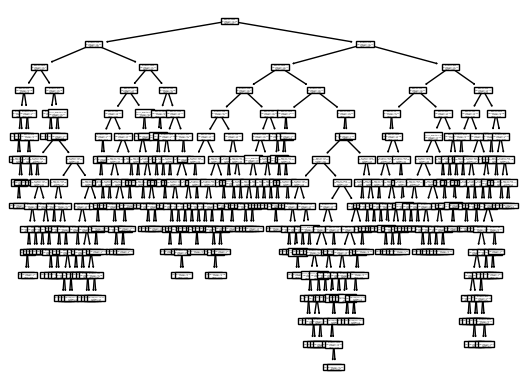

In [9]:
plot_tree(DTR, feature_names=X_train.columns)
plt.show()